In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score as r
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

C:\Users\deepk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df=data.drop(['url','phone'],axis=1)

In [10]:
df.duplicated().sum()

43

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [14]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [16]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [18]:
df['cost']=df['cost'].apply(lambda x:x.replace(',',''))
df['cost']=df['cost'].astype(float)

In [19]:
print(df['cost'].unique())
df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [20]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df=df.loc[df.rate != 'NEW']
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
df['rate']=df['rate'].apply(lambda x:x.replace('/5',''))
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

***Exploratory Data Analysis***

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

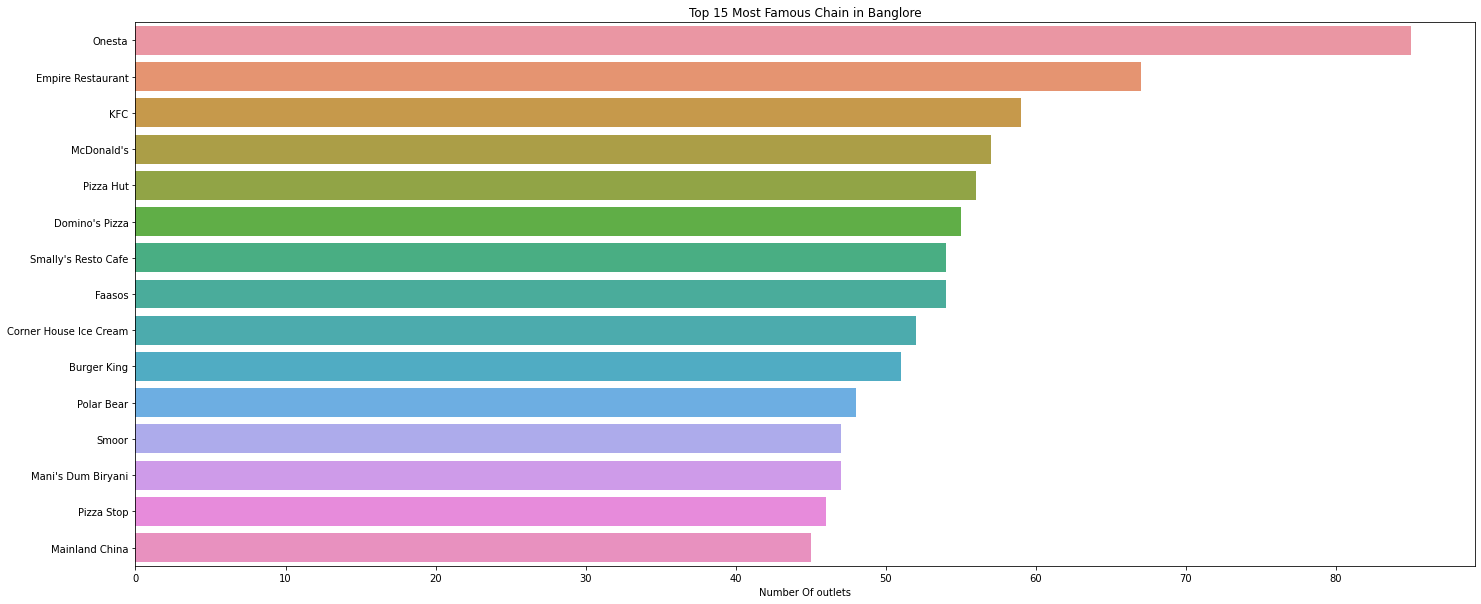

In [24]:
plt.figure(figsize=(24,10))
chain=df['name'].value_counts()[:15]
sns.barplot(x=chain,y=chain.index)
plt.title("Top 15 Most Famous Chain in Banglore")
plt.xlabel('Number Of outlets')
plt.show()

Text(0.5, 1.0, 'Restaurants delivering online or not')

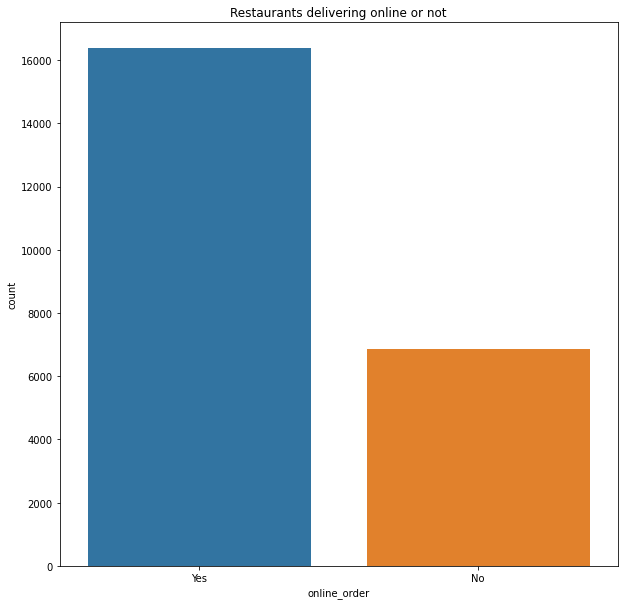

In [25]:
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Restaurants delivering online or not")

Text(0.5, 1.0, 'Restaurants booking tables online or not')

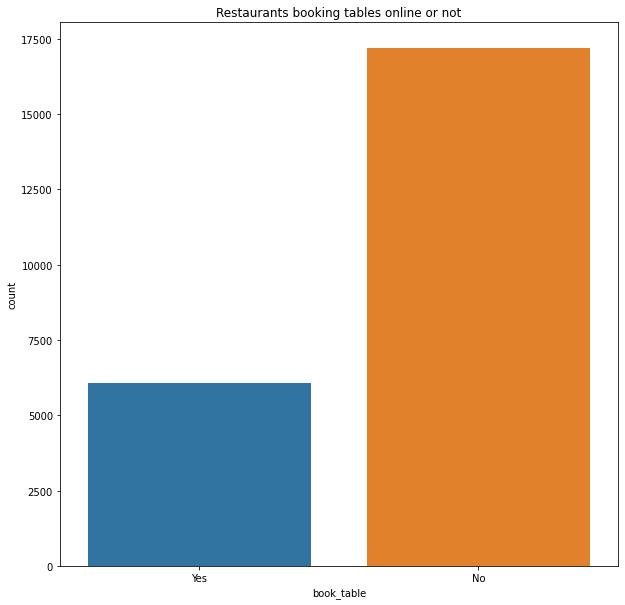

In [26]:
sns.countplot(df['book_table'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Restaurants booking tables online or not")

Text(0.5, 1.0, 'Location wise count for restaurants')

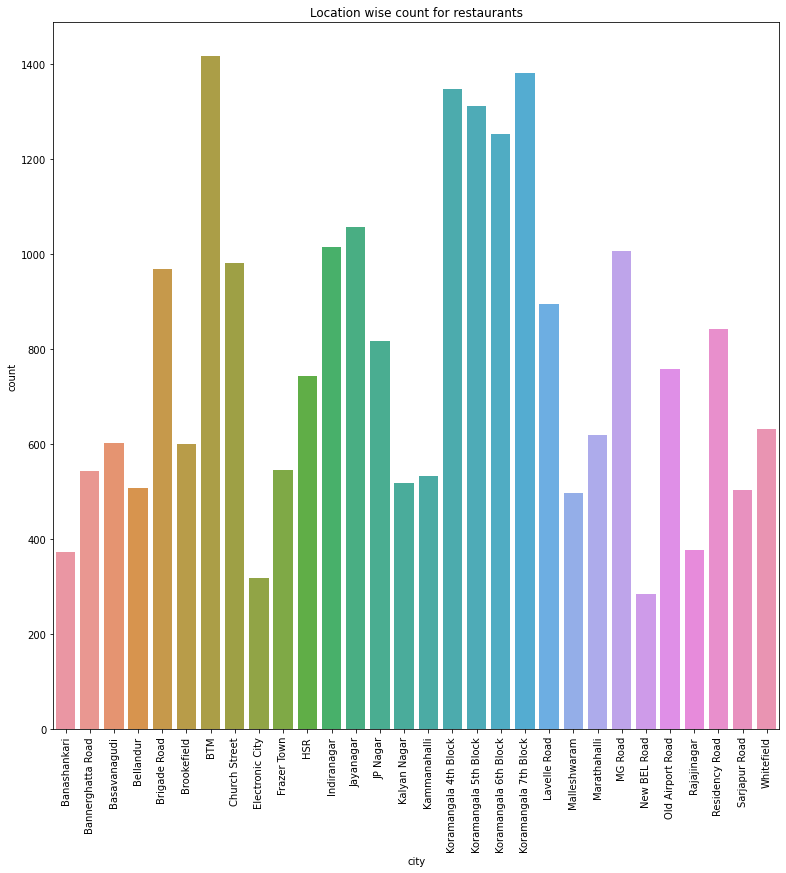

In [27]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

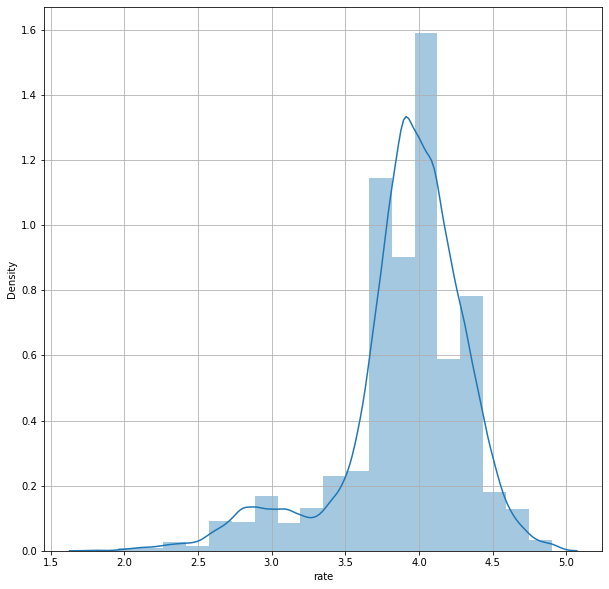

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(df['rate'],bins=20)
plt.grid()

***Most of the rating are within 3.5 and 4.5***

Text(0.5, 1.0, 'Type of Service')

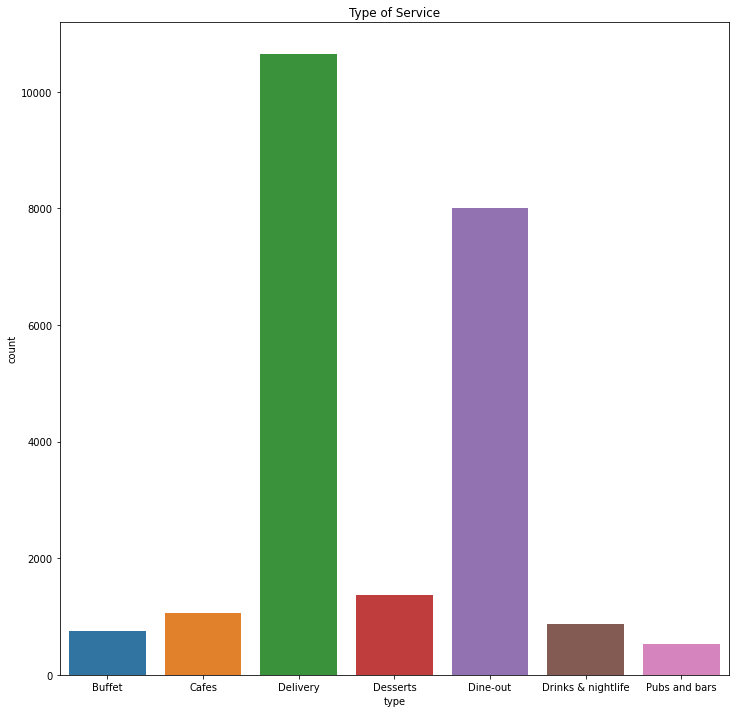

In [29]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels())
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

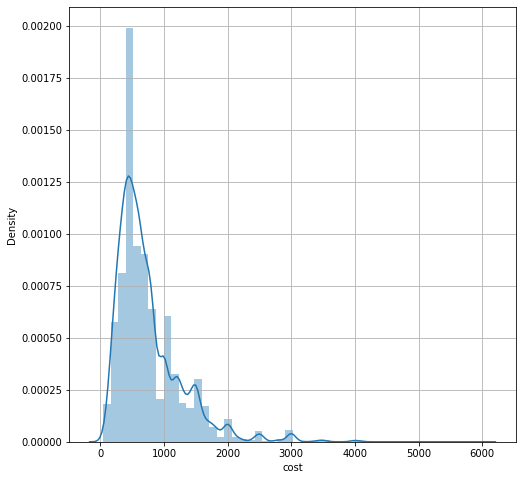

In [30]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.grid()
plt.show()


Text(0.5, 0, 'count')

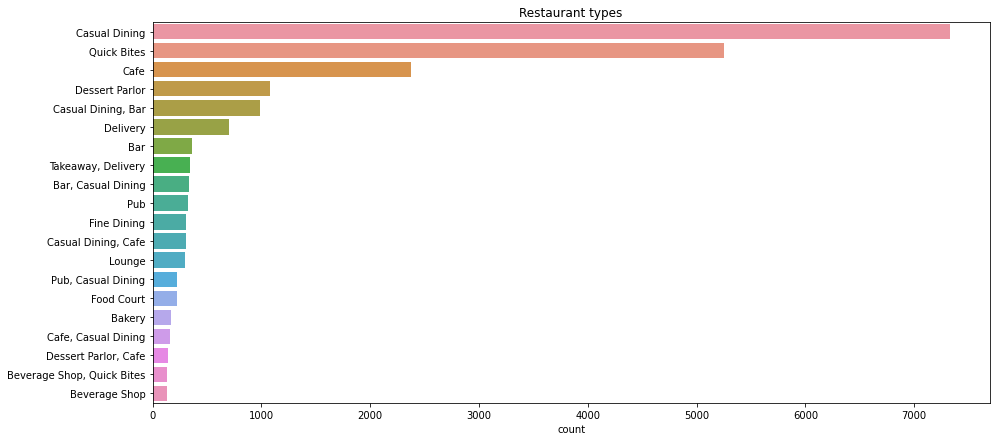

In [31]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

****Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Bangalore****

In [32]:
import re
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array=re.split(',',df['dish_liked'][i])
    for item in array:
        likes.append(item)

In [33]:
favfood=pd.Series(likes).value_counts()

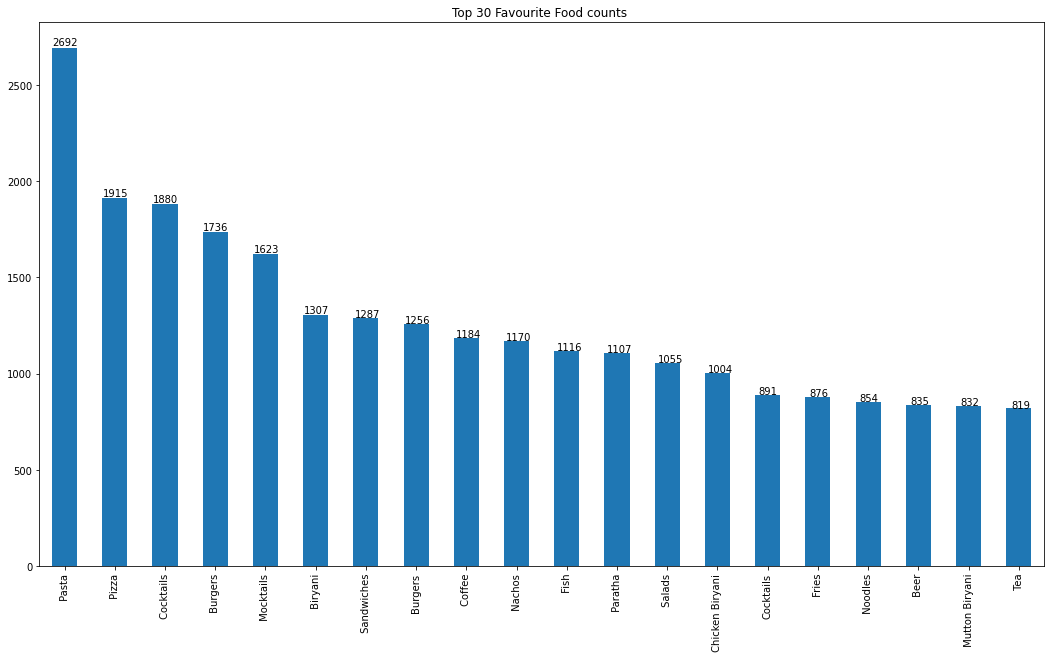

In [34]:
ax = favfood.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

****The 5 most liked dishes are Pasta,Pizza,Cocktails,Burgers,and Mocktails****

****Convert the online categorical variables into a numeric format****

In [35]:
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [36]:
df.online_order=pd.to_numeric(df.online_order)
df.online_order

0        1
1        1
2        1
3        0
4        0
        ..
23243    1
23244    0
23245    0
23246    0
23247    0
Name: online_order, Length: 23248, dtype: int64

****Convert the String categorical variables into a numeric format****

In [37]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [38]:
df.book_table = pd.to_numeric(df.book_table)
df.book_table

0        1
1        0
2        0
3        0
4        0
        ..
23243    1
23244    0
23245    0
23246    0
23247    1
Name: book_table, Length: 23248, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [40]:
df.tail(15)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
23233,"The Waverly Hotels, Whitefield, Bangalore",The Whitefield Arms Pub & Microbrewery,1,1,4.2,1113,84,61,"Beer, Chicken Tikka, Cosmopolitan, Burgers, Co...",312,1600.0,"[('Rated 4.0', ""RATED\n I never knew of this ...",5047,Pubs and bars,Whitefield
23234,"TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...",The Irish House,0,1,4.3,1776,84,26,"Beer, Cocktails, Burgers, Chicken Nachos, Mock...",800,1700.0,"[('Rated 4.0', 'RATED\n Nice place to grab a ...",5047,Pubs and bars,Whitefield
23235,"Level 2, Phoenix Marketcity, Mahadevpura, Whit...",Shizusan Shophouse & Bar,1,1,4.4,1313,84,21,"California Roll, Cocktails, Mocktails, Maki Ro...",150,1800.0,"[('Rated 3.0', 'RATED\n Wanted to try this pl...",5047,Pubs and bars,Whitefield
23236,"3-A1, Kundanahalli Main Road, Mahadevpura, Opp...",Kava Kitchen & Bar - Fairfield by Marriott,0,0,3.9,74,84,21,Dal Halwa,1441,1200.0,"[('Rated 4.0', 'RATED\n Loved the food, thoug...",5047,Pubs and bars,Whitefield
23237,"S-10, Level 2, Phoenix Market City, Whitefield...",Harry's Bar + Cafe,1,1,4.1,1218,84,57,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...",123,1200.0,"[('Rated 4.0', 'RATED\n The first thing that ...",5047,Pubs and bars,Whitefield
23238,"Level 2, Phoenix Marketcity, Whitefield, Banga...",BAR BAR,0,1,4.1,1003,84,5,"Mocktails, Cocktails, Pizza, Chicken Tikka, Na...",738,1500.0,"[('Rated 4.0', ""RATED\n In an increasingly ov...",5047,Pubs and bars,Whitefield
23239,"Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...",The Beer Cafe,1,1,4.1,673,84,57,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...",900,1400.0,"[('Rated 2.0', ""RATED\n We went out to this p...",5047,Pubs and bars,Whitefield
23240,"2, Graphite India Road, Doddanekundi Industria...",Pablo's Gastrobar,0,0,4.0,1094,84,4,"Cocktails, Beer, Pizza, Long Island Iced Tea, ...",879,1450.0,"[('Rated 4.0', 'RATED\n A good place to dine....",5047,Pubs and bars,Whitefield
23241,"ITPL Ascendas Park Square Mall, ITPL, First Fl...",Oliver's Pub & Diner,1,1,3.9,548,84,60,"Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...",880,1500.0,"[('Rated 4.0', ""RATED\n I had :-\n\n1. Italia...",5047,Pubs and bars,Whitefield
23242,"2nd Floor, Phoenix Market City, Whitefield, Ba...",Smaaash,0,1,4.0,189,84,26,"Pizza, Beer",1404,1500.0,"[('Rated 3.0', 'RATED\n Like this place for z...",5047,Pubs and bars,Whitefield


****Train and test splits of data****

In [49]:
x=df.iloc[:,[2,3,5,6,7,9,10]]
x.head(50)

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,1,20,1386,800.0
1,1,0,787,1,20,594,800.0
2,1,0,918,1,16,484,800.0
3,0,0,88,1,62,1587,300.0
4,0,0,166,4,20,1406,600.0
5,1,0,286,4,20,1156,600.0
6,1,1,2556,1,22,1468,600.0
7,1,0,324,1,13,462,700.0
8,1,0,504,1,13,485,550.0
9,1,0,402,1,13,332,500.0


In [42]:
y=df['rate']
y.astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

****Building Models****

**Linear Regression**

In [44]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)*100

23.35738160606612

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)*100

89.86829623442857

***ExtraTree Regressor***

In [46]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)*100

94.6769926374254

*****r2_score of Extra Tree Regressor is highest which gives us the best model*****

In [47]:
import pickle
# # Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
print(y_predict)

[4.         3.85       2.45416667 ... 3.4        4.5        4.1       ]
